# All imports necessary

In [2]:
import os
import pandas as pd
import numpy as np

In [27]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

In [91]:
import matplotlib_venn as venn

# Download the data from Kaggle

Kaggle competition link is [here](https://www.kaggle.com/c/kkbox-music-recommendation-challenge).

In [3]:
!pip -V

pip 10.0.1 from C:\Users\Efim_Golovin\Desktop\COURSES\ML\11. RECOMMENDATION SYSTEMS_2\RECOMMENDATION_SYSTEMS_2\venv\lib\site-packages\pip-10.0.1-py3.6.egg\pip (python 3.6)



In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2616           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9819           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4103           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         26           False  
pubg-finish-placement-prediction               2019-01-30 23:59:00  Playground            Swag        499           False  
human-protein-atlas-image-classification       2019-01-10 23:59:00  Featured           $37,000        287           False  
two-sigm

In [4]:
!kaggle competitions download -c kkbox-music-recommendation-challenge -p ../data/datasets/

  0%|                                                | 0.00/453k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 453k/453k [00:00<00:00, 5.77MB/s]
 78%|█████████████████████████████▌        | 1.00M/1.29M [00:00<00:00, 5.19MB/s]
100%|██████████████████████████████████████| 1.29M/1.29M [00:00<00:00, 5.30MB/s]
100%|██████████████████████████████████████| 41.9M/41.9M [00:07<00:00, 5.77MB/s]

100%|████████████████████████████████████████| 101M/101M [00:18<00:00, 5.88MB/s]

100%|███████████████████████████████████████▊| 101M/101M [00:19<00:00, 4.10MB/s]
100%|████████████████████████████████████████| 101M/101M [00:19<00:00, 5.40MB/s]
100%|██████████████████████████████████████| 98.8M/98.8M [00:19<00:00, 4.87MB/s]



In [6]:
!ls -alth ../data/datasets/

итого 345M
-rw-rw-r--. 1 bender bender  99M окт 17 03:02 song_extra_info.csv.7z
drwxrwxr-x. 2 bender bender 4,0K окт 17 03:02 .
-rw-rw-r--. 1 bender bender 102M окт 17 03:02 train.csv.7z
-rw-rw-r--. 1 bender bender 101M окт 17 03:01 songs.csv.7z
-rw-rw-r--. 1 bender bender  42M окт 17 03:01 test.csv.7z
-rw-rw-r--. 1 bender bender 1,3M окт 17 03:01 members.csv.7z
-rw-rw-r--. 1 bender bender 453K окт 17 03:01 sample_submission.csv.7z
drwxrwxr-x. 3 bender bender 4,0K окт 17 01:39 ..


# Data description from Kaggle

In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set.

KKBOX provides a training data set consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided. The use of public data to increase the level of accuracy of your prediction is encouraged.

The train and the test data are selected from users listening history in a given time period. Note that this time period is chosen to be before the [WSDM-KKBox Churn Prediction](https://www.kaggle.com/c/kkbox-churn-prediction-challenge) time period. The train and test sets are split based on time, and the split of public/private are based on unique user/song pairs.

## Tables

### train.csv

- <span style="color:#7aa05d">**msno:**</span> user id
- <span style="color:#7aa05d">**song_id:**</span> song id
- <span style="color:#7aa05d">**source_system_tab:**</span> the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- <span style="color:#7aa05d">**source_screen_name:**</span> name of the layout a user sees.
- <span style="color:#7aa05d">**source_type:**</span> an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- <span style="color:#7aa05d">**target:**</span> this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### test.csv

- <span style="color:#7aa05d">**id:**</span> row id (will be used for submission)
- <span style="color:#7aa05d">**msno:**</span> user id
- <span style="color:#7aa05d">**song_id:**</span> song id
- <span style="color:#7aa05d">**source_system_tab:**</span> the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- <span style="color:#7aa05d">**source_screen_name:**</span> name of the layout a user sees.
- <span style="color:#7aa05d">**source_type:**</span> an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

### sample_submission.csv

sample submission file in the format that we expect you to submit

- <span style="color:#7aa05d">**id:**</span> same as id in test.csv
- <span style="color:#7aa05d">**target:**</span> this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### songs.csv

The songs. Note that data is in unicode.

- <span style="color:#7aa05d">**song_id**</span>
- <span style="color:#7aa05d">**song_length:**</span> in ms
- <span style="color:#7aa05d">**genre_ids:**</span> genre category. Some songs have multiple genres and they are separated by |
- <span style="color:#7aa05d">**artist_name**</span>
- <span style="color:#7aa05d">**composer**</span>
- <span style="color:#7aa05d">**lyricist**</span>
- <span style="color:#7aa05d">**language**</span>

### members.csv

user information.

- <span style="color:#7aa05d">**msno**</span>
- <span style="color:#7aa05d">**city**</span>
- <span style="color:#7aa05d">**bd:**</span> age. Note: this column has outlier values, please use your judgement.
- <span style="color:#7aa05d">**gender**</span>
- <span style="color:#7aa05d">**registered_via:**</span> registration method
- <span style="color:#7aa05d">**registration_init_time:**</span> format %Y%m%d
- <span style="color:#7aa05d">**expiration_date:**</span> format %Y%m%d

### song_extra_info.csv

- <span style="color:#7aa05d">**song_id**</span>
- <span style="color:#7aa05d">**song name:**</span> the name of the song.
- <span style="color:#7aa05d">**isrc:**</span> [International Standard Recording Code](https://en.wikipedia.org/wiki/International_Standard_Recording_Code), theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

# Read the data

## Song extra info

In [8]:
data_directory = '../data/datasets/'

In [9]:
song_extra_info = pd.read_csv(os.path.join(data_directory, 'song_extra_info.csv'))

In [10]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [11]:
song_extra_info.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    2295971 non-null object
name       2295969 non-null object
isrc       2159423 non-null object
dtypes: object(3)
memory usage: 52.6+ MB


## Train

In [12]:
train = pd.read_csv(os.path.join(data_directory, 'train.csv'))

In [13]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [14]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  7377418 non-null object
song_id               7377418 non-null object
source_system_tab     7352569 non-null object
source_screen_name    6962614 non-null object
source_type           7355879 non-null object
target                7377418 non-null int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [42]:
train['data_from'] = 'train'

In [56]:
train.msno.nunique()

30755

In [57]:
train.song_id.nunique()

359966

In [58]:
train.source_system_tab.nunique()

8

In [61]:
train.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [59]:
train.source_screen_name.nunique()

20

In [62]:
train.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [60]:
train.source_type.nunique()

12

In [63]:
train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

## Test

In [15]:
test = pd.read_csv(os.path.join(data_directory, 'test.csv'))

In [16]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [17]:
test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    2556790 non-null int64
msno                  2556790 non-null object
song_id               2556790 non-null object
source_system_tab     2548348 non-null object
source_screen_name    2393907 non-null object
source_type           2549493 non-null object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [35]:
test['target'] = None

In [37]:
test['data_from'] = 'test'

In [64]:
test.msno.nunique()

25131

In [65]:
test.song_id.nunique()

224753

In [66]:
test.source_system_tab.nunique()

8

In [67]:
test.source_system_tab.value_counts()

my library      1019492
discover         871068
search           277615
radio            212765
listen with       98628
explore           66023
notification       2124
settings            633
Name: source_system_tab, dtype: int64

In [68]:
test.source_screen_name.nunique()

22

In [69]:
test.source_screen_name.value_counts()

Local playlist more     845115
Online playlist more    529807
Radio                   211201
Album more              176129
Search                  121982
Artist more             110999
Discover Feature         93401
Others profile more      90457
Discover Chart           78999
Discover Genre           41617
Explore                  27872
My library               25559
Unknown                  23620
Discover New              5277
Search Trends             4883
Search Home               4705
My library_Search         2114
Self profile more          131
People local                13
Concert                     13
Payment                     12
People global                1
Name: source_screen_name, dtype: int64

In [70]:
test.source_type.nunique()

12

In [71]:
test.source_type.value_counts()

online-playlist           774532
local-library             582346
local-playlist            294537
radio                     215164
album                     195190
top-hits-for-artist       179360
song                      129153
song-based-playlist        87179
listen-with                84499
topic-article-playlist      5082
my-daily-playlist           2023
artist                       428
Name: source_type, dtype: int64

## Songs

In [33]:
songs = pd.read_csv(os.path.join(data_directory, 'songs.csv'))

In [19]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [20]:
songs.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        2296320 non-null object
song_length    2296320 non-null int64
genre_ids      2202204 non-null object
artist_name    2296320 non-null object
composer       1224966 non-null object
lyricist       351052 non-null object
language       2296319 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [75]:
songs.lyricist.fillna('unknown', inplace=True)

In [77]:
songs.composer.fillna('unknown', inplace=True)

In [53]:
songs.language.fillna(-1, inplace=True)

In [54]:
songs.language = songs.language.astype(np.int64)

In [55]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [78]:
songs.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        2296320 non-null object
song_length    2296320 non-null int64
genre_ids      2202204 non-null object
artist_name    2296320 non-null object
composer       2296320 non-null object
lyricist       2296320 non-null object
language       2296320 non-null int64
dtypes: int64(2), object(5)
memory usage: 122.6+ MB


In [79]:
songs.song_length.nunique()

146534

In [80]:
songs.genre_ids.nunique()

1045

In [81]:
songs.artist_name.nunique()

222363

In [82]:
songs.composer.nunique()

329823

In [84]:
songs.lyricist.nunique()

110925

In [85]:
songs.language.nunique()

10

## Members

In [21]:
members = pd.read_csv(os.path.join(data_directory, 'members.csv'))

In [22]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [23]:
members.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [43]:
members.fillna('unknown', inplace=True)

In [44]:
members.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    34403 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [45]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,unknown,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,unknown,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,unknown,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,unknown,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,unknown,4,20170126,20170613


## Sample submission

In [24]:
sample_submission = pd.read_csv(os.path.join(data_directory, 'sample_submission.csv'))

In [25]:
sample_submission.head(10)

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [26]:
sample_submission.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
id        2556790 non-null int64
target    2556790 non-null float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB


# Check mappings

## Members mappings

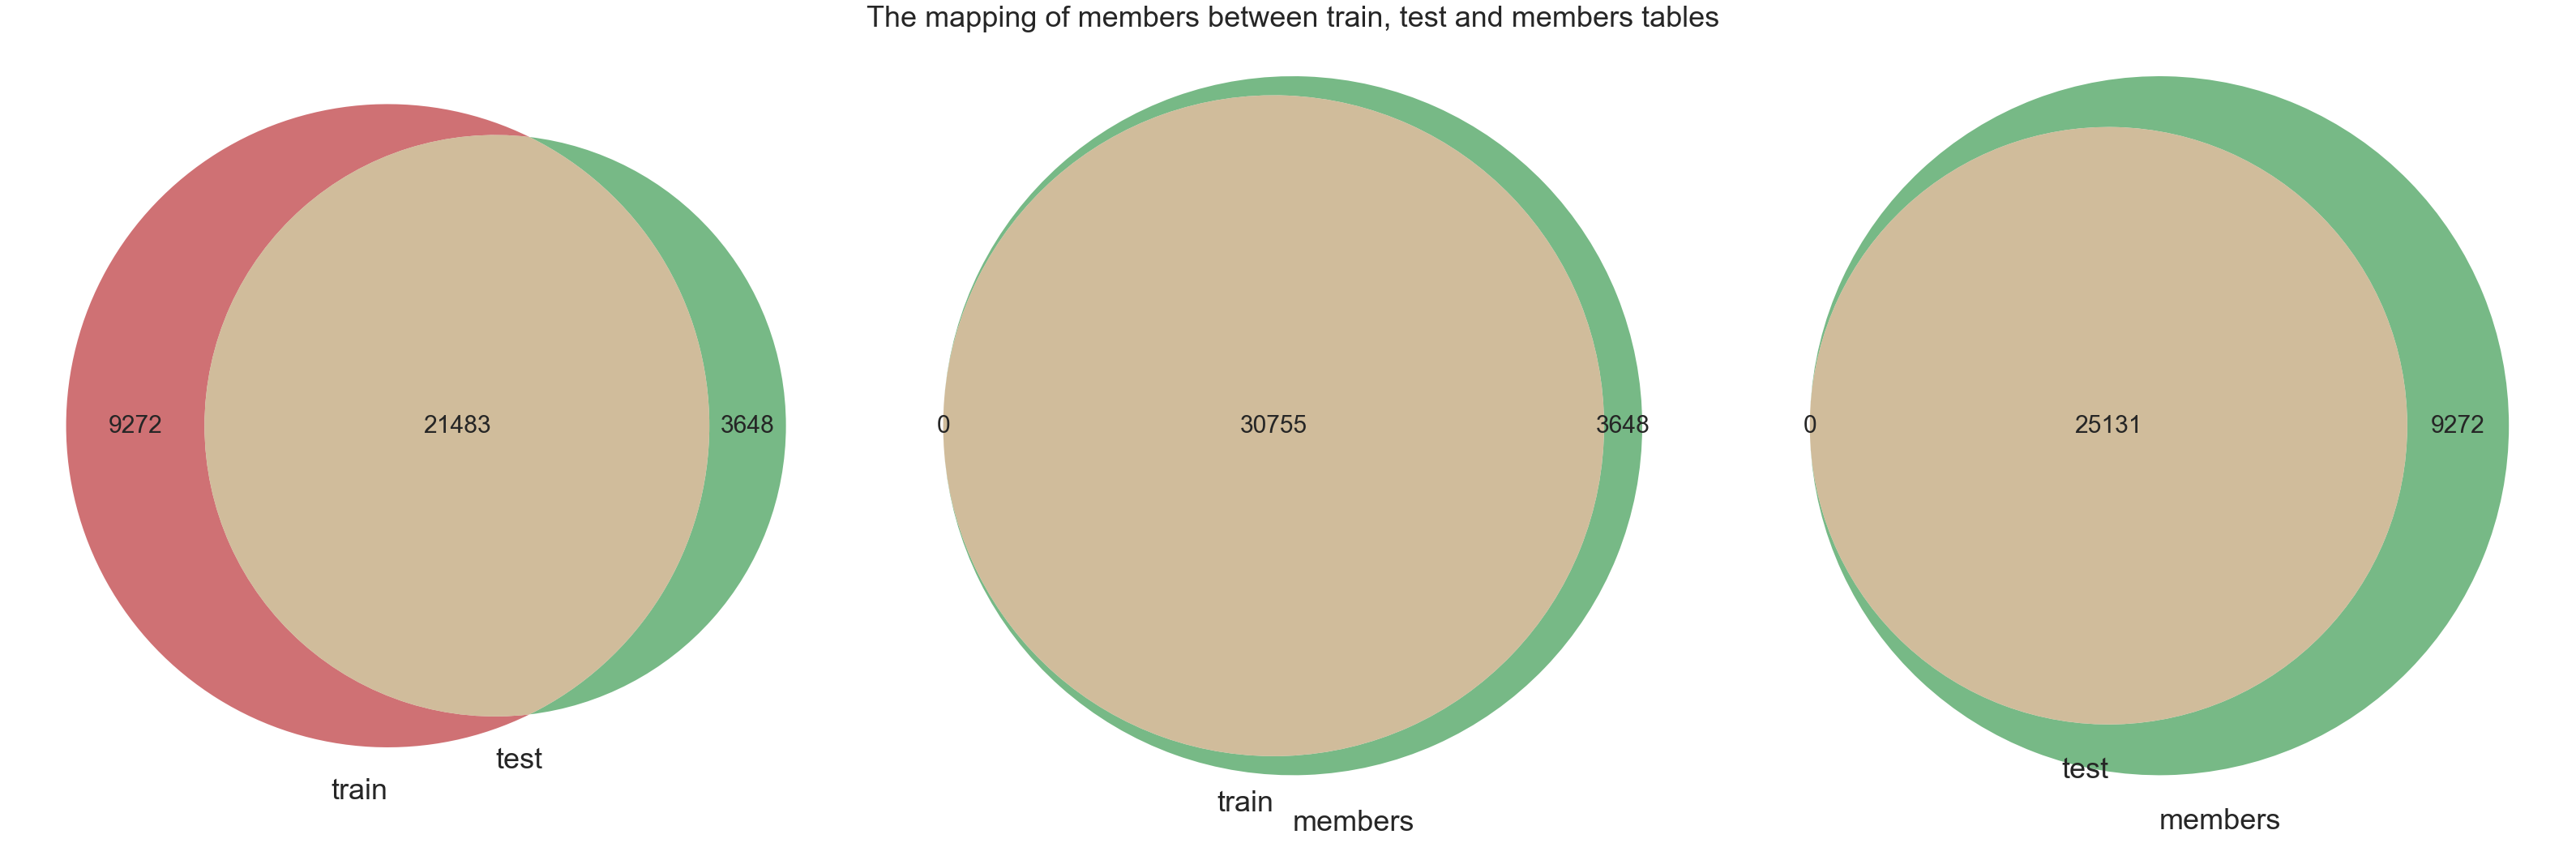

In [129]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(45, 15), facecolor='None')
venn.venn2(subsets=[set(train.msno), set(test.msno)], set_labels=['train', 'test'], alpha=0.8, ax=ax1)
venn.venn2(subsets=[set(train.msno), set(members.msno)], set_labels=['train', 'members'], alpha=0.8, ax=ax2)
venn.venn2(subsets=[set(test.msno), set(members.msno)], set_labels=['test', 'members'], alpha=0.8, ax=ax3)
f.suptitle('The mapping of members between train, test and members tables')
plt.tight_layout()
plt.show()

## Songs mappings

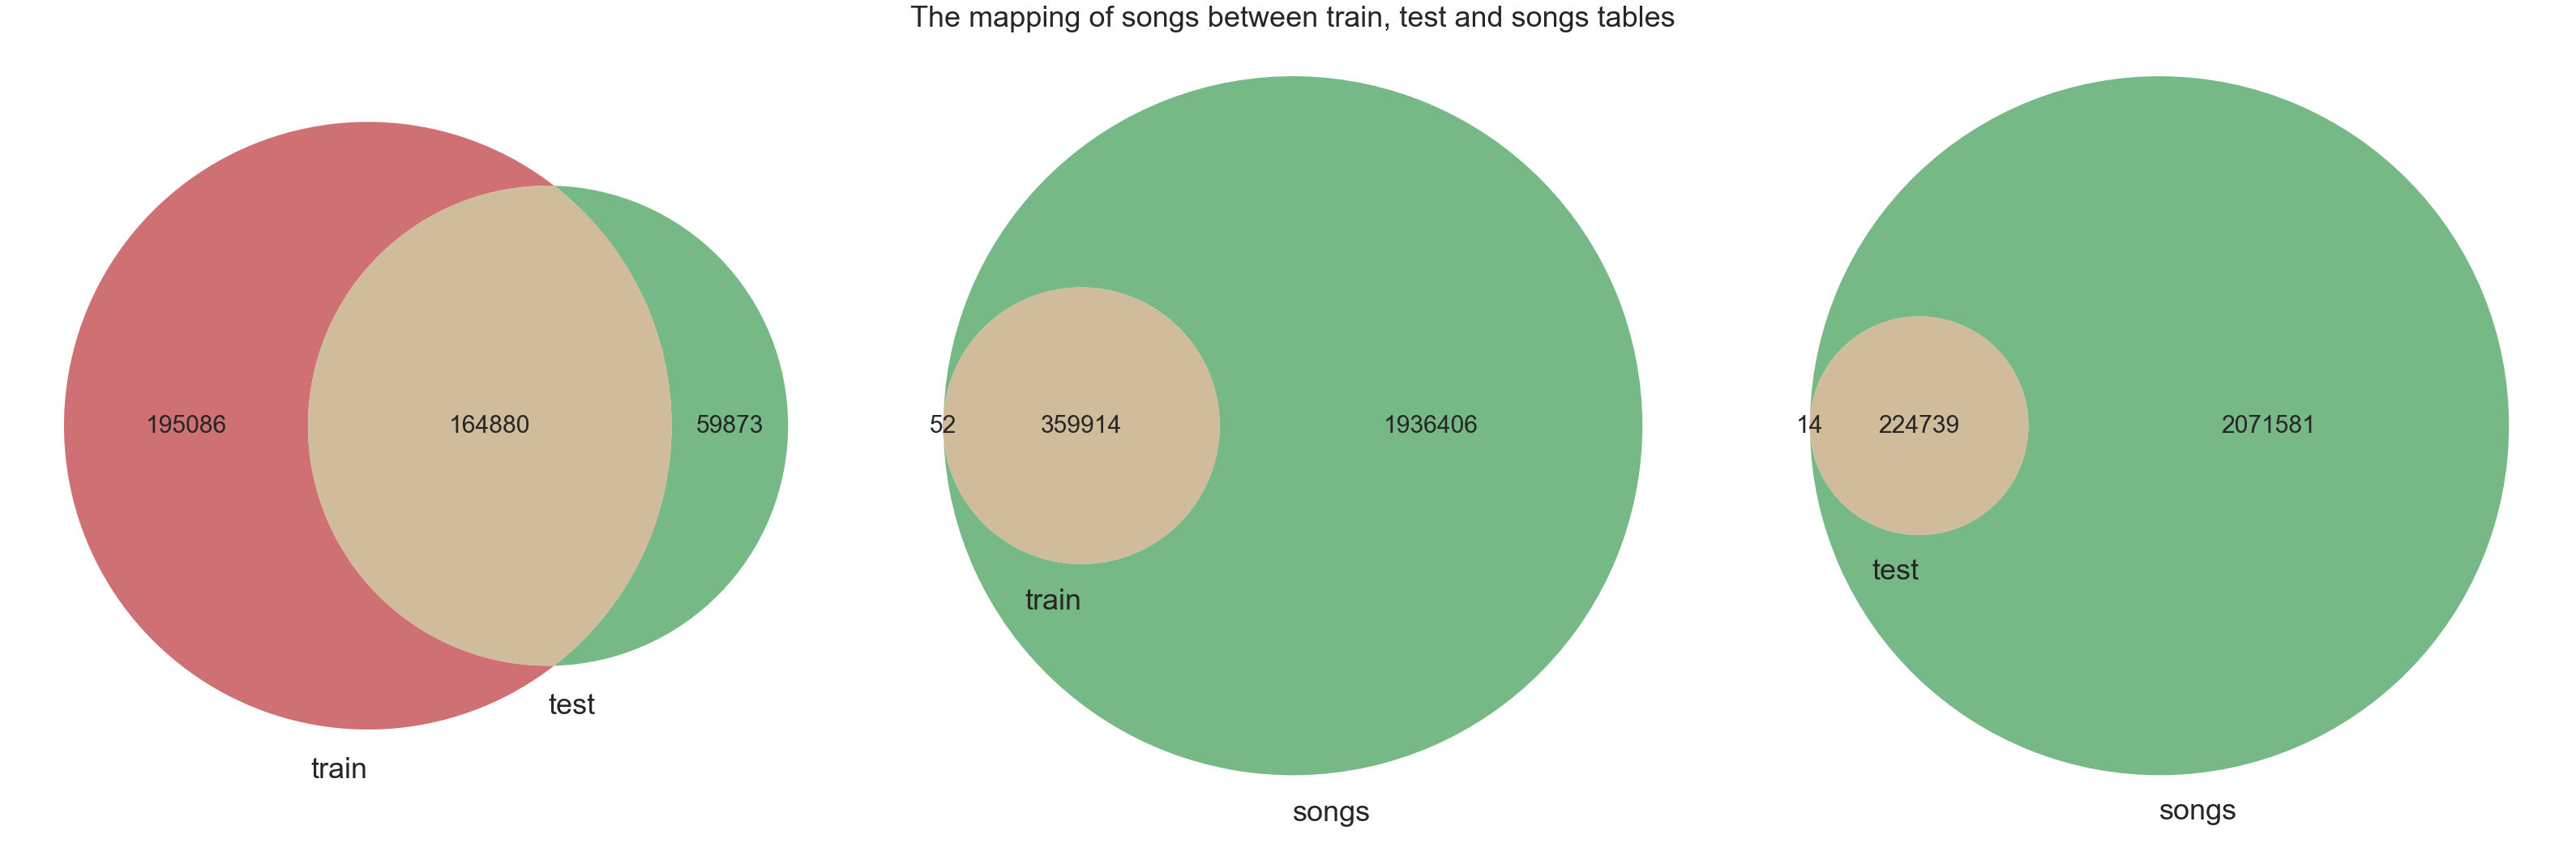

In [128]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(45, 15), facecolor='None')
venn.venn2(subsets=[set(train.song_id), set(test.song_id)], set_labels=['train', 'test'], alpha=0.8, ax=ax1)
venn.venn2(subsets=[set(train.song_id), set(songs.song_id)], set_labels=['train', 'songs'], alpha=0.8, ax=ax2)
venn.venn2(subsets=[set(test.song_id), set(songs.song_id)], set_labels=['test', 'songs'], alpha=0.8, ax=ax3)
f.suptitle('The mapping of songs between train, test and songs tables')
plt.tight_layout()
plt.show()

In [130]:
len(train[train.song_id.isin(set(train.song_id) - set(songs.song_id))])

114

In [132]:
train[train.song_id.isin(set(train.song_id) - set(songs.song_id))]

,msno,song_id,source_system_tab,source_screen_name,source_type,target,data_from
17865,32cgPD/BbmvhjjVCmkovSHFfgeMIlUnJe5ILtcTLUr0=,DHq4+axdk09TxwsxUbI+pWdzROsckleX+T1fm7u0/So=,my library,Local playlist more,local-playlist,0,train
33898,OHRtginG8VMGOkEHIOZIUsI25STd9NFOuOX8kXyDbJM=,OtLPFbGc3Y0JCFRG785mLrpsGAUgMZ1q0XAdqUnl+es=,explore,Explore,album,0,train
37179,SCxpcNpxlmZgJzUtTTx6R3/7zbcBHhV/ZrTGnhqXME0=,sIstoLt134OfZXyetCoUqBuDas1he9uZot5EkFdp7+o=,my library,Local playlist more,local-library,0,train
66911,trn8fkzQ8df7uicgIkA9AMnwqETirz77eMTUQNhKH1Q=,3+OBQRyVxirbtD79O0oyj/kVwcq7A8ghJCRs+LoA0ow=,my library,Local playlist more,local-playlist,1,train
346482,ITiE2zbCjjXoGflqFUa9pbJT35i3eKao4b2tTfyAShQ=,WKCEUOm70//9O7IQ3VE2ohtiJaDGUH7cChanz4plSdA=,my library,Local playlist more,local-playlist,1,train
384808,BsK6uTnwaTHP+nSJTBrWbblCseJdZ4TKR90HPU7uNg0=,a0S959XXxdHq02RRyJIYYysamjxwJNmoCnkadrWVrjA=,my library,Album more,album,0,train
603743,Os2AqQn51gs+Z/nl28XPFwTR2o0Qsro2QAvwGIbZYLc=,o6G9PiWV55Shat8JNnNUp5IsK4U+dKQEg05PgSt4GZc=,my library,Local playlist more,local-library,0,train
739046,aHL+SJaFXhVun0zqx5e5EVq6clEBNZmqpWv5DZFouMk=,Kp8wT5LyqPU9Gj6bhMyzxxWzvtOnM4hyKSke+KBMQS4=,search,Search,online-playlist,0,train
777679,BF97sQNyf77oqUSZH1SZHvJLbSUqhk88Zv/7BD1/ed8=,WKCEUOm70//9O7IQ3VE2ohtiJaDGUH7cChanz4plSdA=,my library,Local playlist more,local-playlist,1,train
795767,yBXKYfcmQ+TtIEvkLQXabAY2uwudIGn21dEZYAwCDCg=,bo+kTVU6S1dC0ksT88FZLBUf8ax+jBWL6oOFU4rScEo=,my library,Local playlist more,local-library,1,train


In [131]:
len(test[test.song_id.isin(set(test.song_id) - set(songs.song_id))])

25

In [133]:
test[test.song_id.isin(set(test.song_id) - set(songs.song_id))]

,id,msno,song_id,source_system_tab,source_screen_name,source_type,target,data_from
11519,11519,Ym+dCOcuy/7oR4z0OjdPcGJdbo6EC4TKj5BkkLXeQF0=,ddkBkA8RLGf+Xs4OHY5Th0d/UsrNism6qGTbJk6zvyI=,my library,Local playlist more,local-library,None,test
28568,28568,qPFwNxuXJ2pH0Eq2GclTYXgMSfZXjPomf4+gKz2c8zo=,a0S959XXxdHq02RRyJIYYysamjxwJNmoCnkadrWVrjA=,my library,Album more,album,None,test
310005,310005,uQvuj9Ka8/SVPhV7fFB8bt2upI/7p+PmdtD2lwk61ls=,qyNvb6FcYM803FBKEdYh7iFLi63FjpepHGkUCD7HB7w=,my library,Local playlist more,local-library,None,test
407244,407244,66YgVN3SwlLuvSDkQdaNFz5ylCHbdmHbceQuWopPT3M=,SxekcRFJ/l4MWpWZhkTsEfD0bLRpqAGZ1Y2Ed1tJ3DY=,my library,Local playlist more,local-playlist,None,test
454868,454868,S/A5GEOI8hXdn17vVHLBLvLtp/UJU6MWH8MrEtCyVnY=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,search,Online playlist more,online-playlist,None,test
476147,476147,UsCBvxfWk3FNh9cFNDyL9YBPOji2J+Med8K8XLLYZs0=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,my library,NaN,top-hits-for-artist,None,test
589260,589260,7ZXkc5u72qDQE8dqQVIaxCfTGEPDF1Ak8R+YWkzl6jI=,q56DHVHETlI2i23Uol52mIH04w1Vk7M9ObL8BBa80pk=,discover,Album more,album,None,test
1098335,1098335,QDvq4xn7ZSBkamVnc8nL672oxKVqcR2zdgRGQf0giXs=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,discover,NaN,top-hits-for-artist,None,test
1291644,1291644,nlXm0mLxAnjr+KUK8NHxHsts3K0PAJBQoeTR49OwzNE=,Nbq4EH8j6MPik4oXXsDZNkdP/bZz/7XayxWVBMzd308=,search,Search,song,None,test
1355921,1355921,px8eWjJqSqveznpopEtVWYhghz+wXqA6jqfy/IJmZ0g=,Dh1uPET9CjT916QXnHI1oUhnwB306jFJ/xemOyU+LYs=,my library,My library,local-library,None,test


In [134]:
len(set(train[train.song_id.isin(set(train.song_id) - set(songs.song_id))].song_id) & set(test[test.song_id.isin(set(test.song_id) - set(songs.song_id))].song_id))

8

# Let's plot some charts

## How does target variable look like?

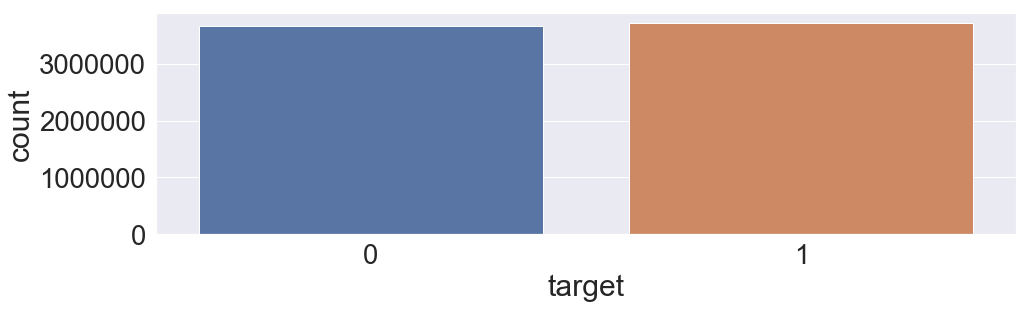

In [34]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15, 5))
ax = sns.countplot('target', data=train, orient='h')
plt.tight_layout()
plt.show()

In [32]:
train.target.value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

## What is the ratio between train and test?

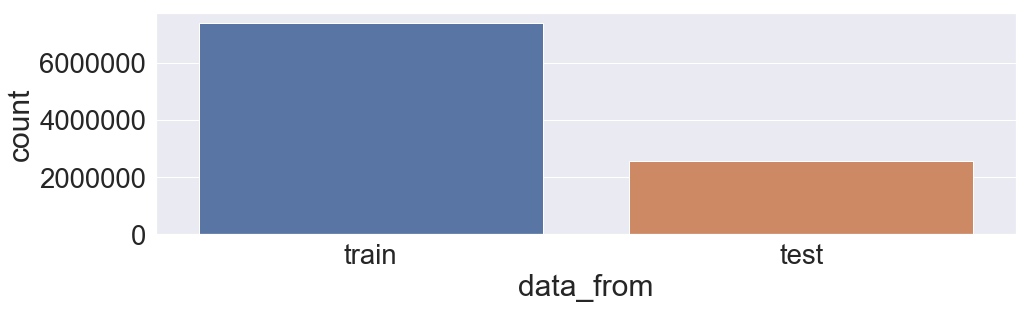

In [41]:
sns.set(font_scale=2.5)
plt.figure(figsize=(15, 5))
ax = sns.countplot('data_from', data=pd.concat([train, test], ignore_index=True, sort=False), orient='h')
plt.tight_layout()
plt.show()